<a href="https://colab.research.google.com/github/CagataySencan/TrafficSignRecognition/blob/main/AdverserialAttack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import  PIL
from PIL import  ImageEnhance , ImageOps , Image
from matplotlib import pyplot
from keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization, LeakyReLU, Reshape, Conv2DTranspose
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import seaborn as sn

In [ ]:
! pip install kaggle

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [ ]:
! unzip gtsrb-german-traffic-sign.zip

In [10]:
trainDatas = pd.read_csv('Train.csv')
testDatas = pd.read_csv('Test.csv')
metaDatas = pd.read_csv('Meta.csv')

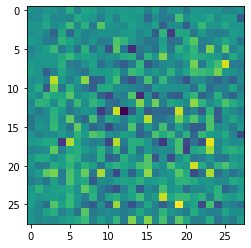

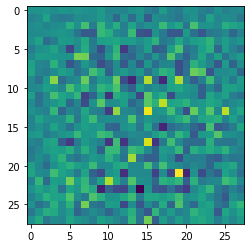

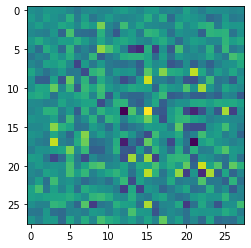

In [69]:
# Eğitim verimizin validation ve eğitim kısmına bölünmesi
X_Train, X_Validate = train_test_split(trainDatas,test_size=0.3,random_state=42)
# Yeni DataFrame oluşturmak için indexleri resetliyoruz
X_Train = X_Train.reset_index(drop = True)
X_Validate = X_Validate.reset_index(drop = True)
batchSize=30
# Validation ve eğitim için veriler bölündü
advFrame = X_Train.sample(n = 5495)
advFrame = advFrame.reset_index(drop = True)
# Advarserial Attack

# Noise için model oluşturduk
def generatorModel():
    model = tf.keras.Sequential()
    model.add(Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

generator = generatorModel()
def advImage(image,generator) :
  noise = tf.random.normal([1, 100])
  generatedImage = generator(noise, training=False)  
for i in range(3) :
    image = Image.open(advFrame['Path'][i])
    
    

  
